In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

* **faturamento_lojas_atuais.csv**: Faturamento mensal das lojas, contendo informações dos anos de 2016 e 2017
* **lojas_atuais.csv**: Não iremos disponibilizar uma descrição das variáveis presentes neste arquivo. Elas representam as características das lojas, como a metragem, número de cadeiras, número de funcionários, etc. Este arquivo também contém as informações da localização da loja. As colunas de localização serão o código do município e código da área de ponderação. Estes códigos são os mesmos utilizados pelo IBGE.
* **cenarios_exapansao.csv**: Dados cadastrais de lojas para serem utilizadas no desafio 2. Este arquivo contém as mesmas informações contidas no arquivo lojas_atuais.csv

**A métrica de avaliação será o RMSE (Root Mean Square Error) entre o valor enviado e o real**

* **desafio_1.csv**
    - Formato: Arquivo texto com separador ‘;’
    - Este arquivo deverá conter a previsão da média de faturamento dos três primeiros meses de 2018, referente as lojas presentes no arquivo lojas_atuais.csv
    - Colunas requeridas:
        - cod_loja
        - faturamento
        
* **desafio_2.csv**
    - Formato: Arquivo texto com separador ‘;’
    - Este arquivo deverá conter a previsão da média de faturamento dos três primeiros meses de 2018, referente as lojas presentes no arquivo cenarios_exapansao.csv
    - Colunas requeridas:
        - cod_loja
        - faturamento

In [3]:
fat_ljs_atual = pd.read_csv('/home/tuts/datasets/uspvsufmg/faturamento_lojas_atuais.csv')
cen_exp = pd.read_csv('/home/tuts/datasets/uspvsufmg/cenarios_expansao.csv')
ljs_atual = pd.read_csv('/home/tuts/datasets/uspvsufmg/lojas_atuais.csv')

___

## Faturamento

- Qual categoria rende mais?
- Qual loja teve a maior receita em todo o período?


- Qual a distribuição das quantidades de venda por categoria? (Verificar considerando as quantidades, qual categoria foi mais lucrativa) -> auxilia na questão de ver se a categoria 11 é realmente predominante
- Qual a contribuição das unidades vendidas na receita? (Valor unitário médio de cada categoria).
- Qual o faturamento por região? (Município, dependendo da distribuição das lojas no país).
- Qual a relação da receita por categoria em cada loja?


- A categoria 11 é predominante em todas as lojas? Ou em apenas na maioria delas?

In [4]:
fat_ljs_atual.head()

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30


In [14]:
fat_ljs_atual.cod_loja.nunique()

3130

In [7]:
fat_ljs_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


In [15]:
fat_ljs_atual.categoria.nunique()

16

In [17]:
fat_ljs_atual.categoria.value_counts()

CATEG_07    73641
CATEG_09    73639
CATEG_11    73639
CATEG_05    73638
CATEG_12    73637
CATEG_03    73637
CATEG_10    73591
CATEG_08    73451
CATEG_04    73344
CATEG_01    73330
CATEG_06    72977
CATEG_13    70967
CATEG_14    69931
CATEG_02    52734
CATEG_15      936
CATEG_16        2
Name: categoria, dtype: int64

### Faturamento trimestral por loja

In [41]:
fat_ljs_atual['datetime'] = pd.to_datetime(fat_ljs_atual.ano*100+fat_ljs_atual.mes,format='%Y%m')
fat_ljs_atual.head()

,cod_loja,ano,mes,categoria,qtde,receita,datetime
0,1,2016,1,CATEG_01,301.00,9164.86,2016-01-01
1,1,2016,2,CATEG_01,187.00,8175.55,2016-02-01
2,1,2016,3,CATEG_01,242.00,10521.67,2016-03-01
3,1,2016,4,CATEG_01,104.00,4560.91,2016-04-01
4,1,2016,5,CATEG_01,100.00,4263.30,2016-05-01


In [48]:
fat_ljs_atual['tri'] = fat_ljs_atual.datetime.dt.quarter
fat_ljs_atual.head()

,cod_loja,ano,mes,categoria,qtde,receita,datetime,tri
0,1,2016,1,CATEG_01,301.00,9164.86,2016-01-01,1
1,1,2016,2,CATEG_01,187.00,8175.55,2016-02-01,1
2,1,2016,3,CATEG_01,242.00,10521.67,2016-03-01,1
3,1,2016,4,CATEG_01,104.00,4560.91,2016-04-01,2
4,1,2016,5,CATEG_01,100.00,4263.30,2016-05-01,2


In [49]:
gb_fat_lj_tri = fat_ljs_atual[['cod_loja', 'tri', 'receita']].groupby(['cod_loja', 'tri'], as_index=False).sum()
gb_fat_lj_tri.head()

,cod_loja,tri,receita
0,1,1,2938994.31
1,1,2,3780701.04
2,1,3,3779037.95
3,1,4,5491841.75
4,2,1,313904.70


### Faturamento mensal por loja

In [55]:
gb_fat_lj_mes = fat_ljs_atual[['cod_loja', 'mes', 'receita']].groupby(['cod_loja', 'mes'], as_index=False).sum()
gb_fat_lj_mes.head()

,cod_loja,mes,receita
0,1,1,845942.14
1,1,2,878950.40
2,1,3,1214101.77
3,1,4,1146681.44
4,1,5,1343759.90


### Receita por loja e categoria

In [69]:
gb_codlj_cat_receita = fat_ljs_atual[['cod_loja', 'categoria', 'receita']].groupby(['cod_loja', 'categoria'], as_index=False).sum()
gb_codlj_cat_receita.head()

,cod_loja,categoria,receita
0,1,CATEG_01,135828.65
1,1,CATEG_02,47374.26
2,1,CATEG_03,1109475.45
3,1,CATEG_04,240339.69
4,1,CATEG_05,1609385.58


In [70]:
loja_das_lojas = gb_codlj_cat_receita.iloc[gb_codlj_cat_receita.receita.argmax()]

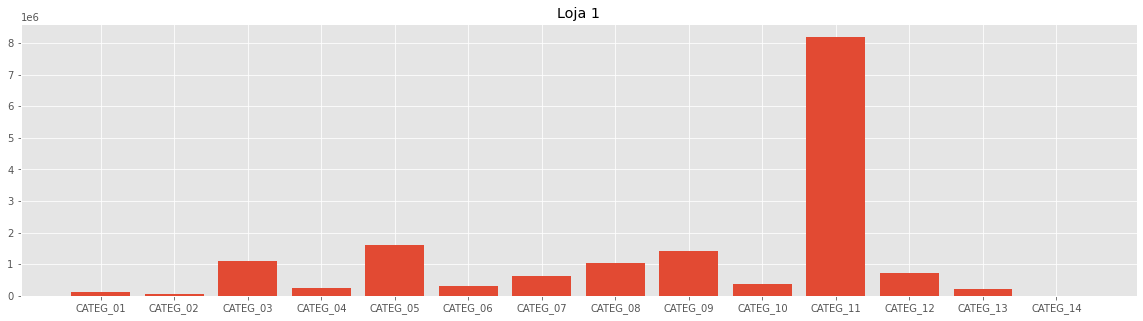

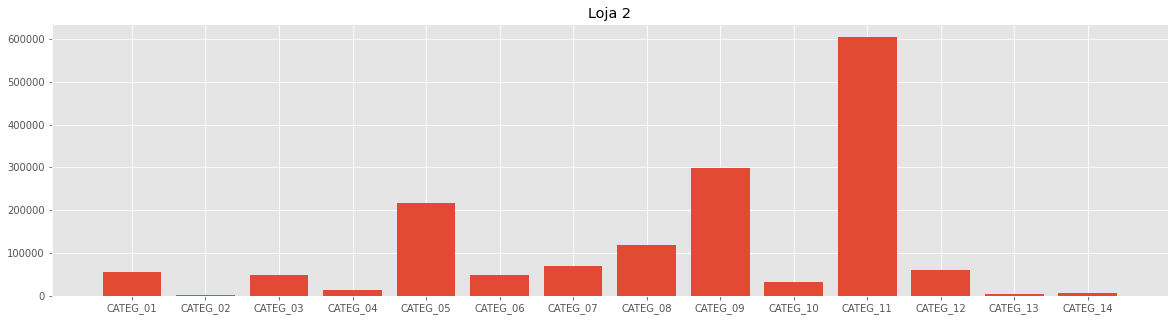

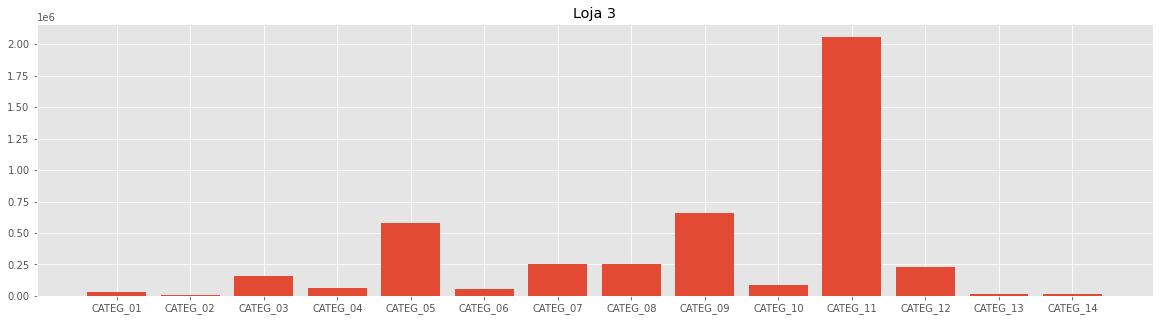

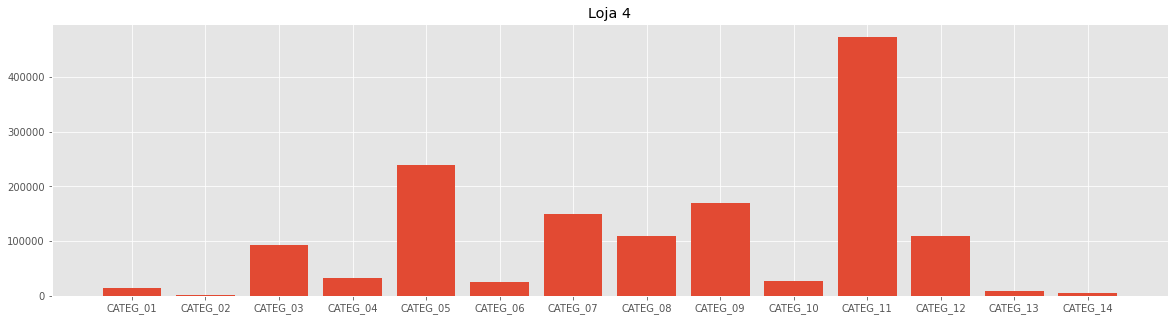

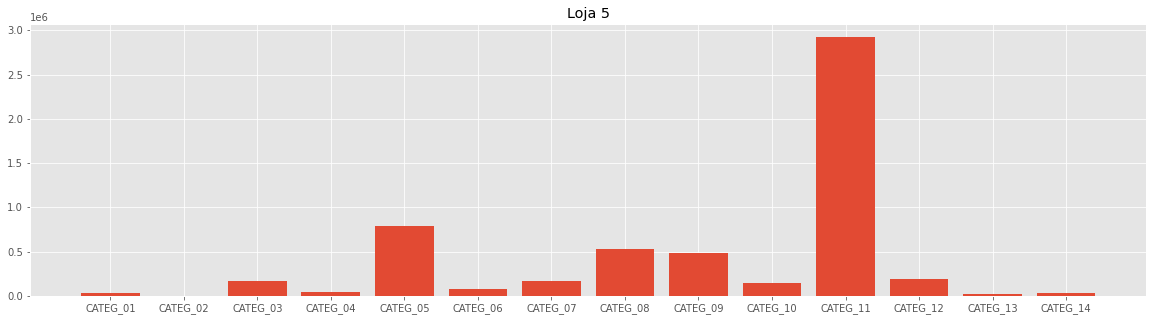

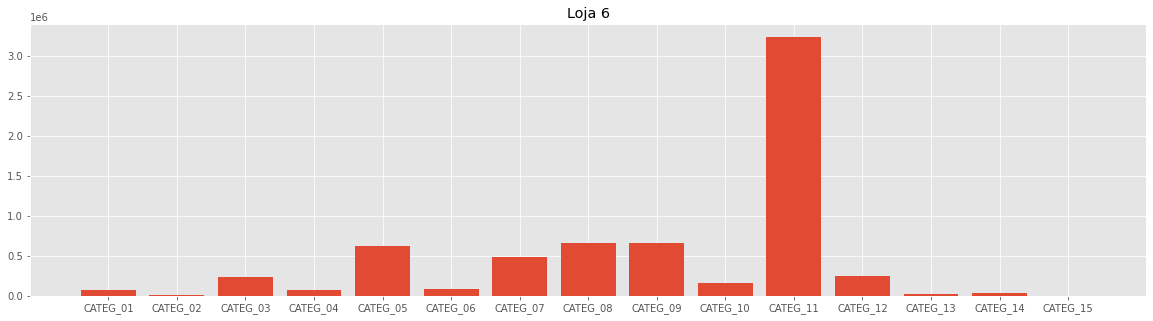

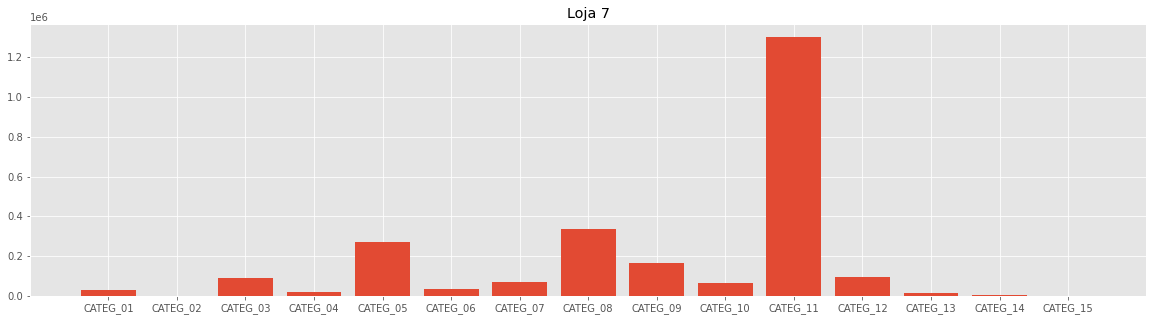

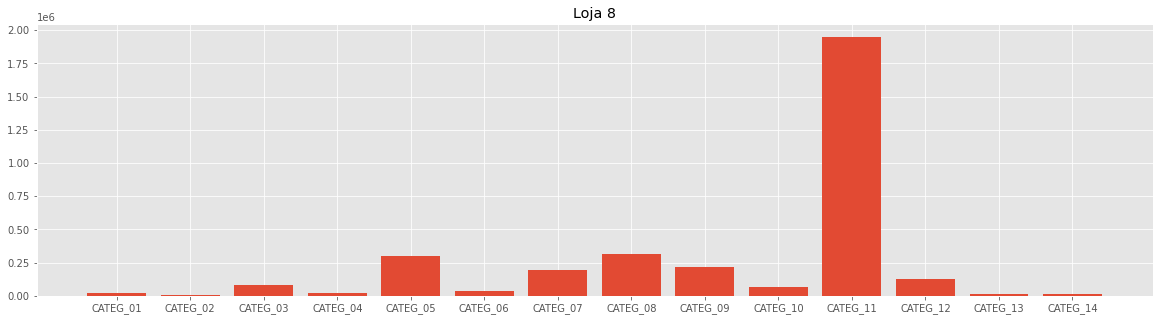

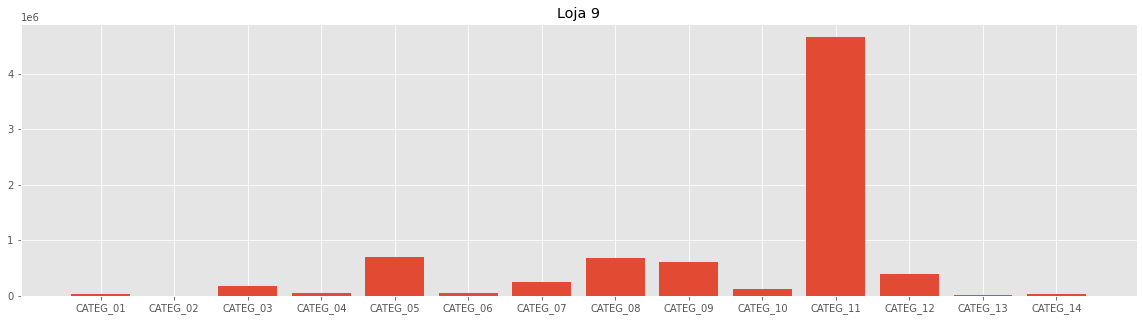

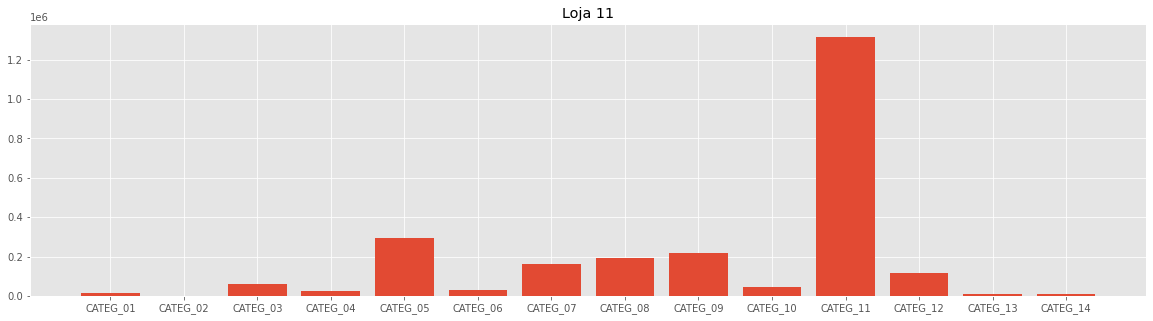

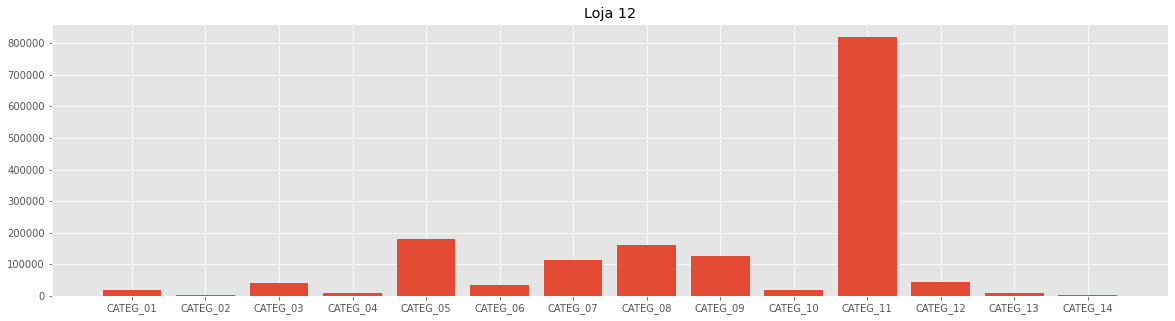

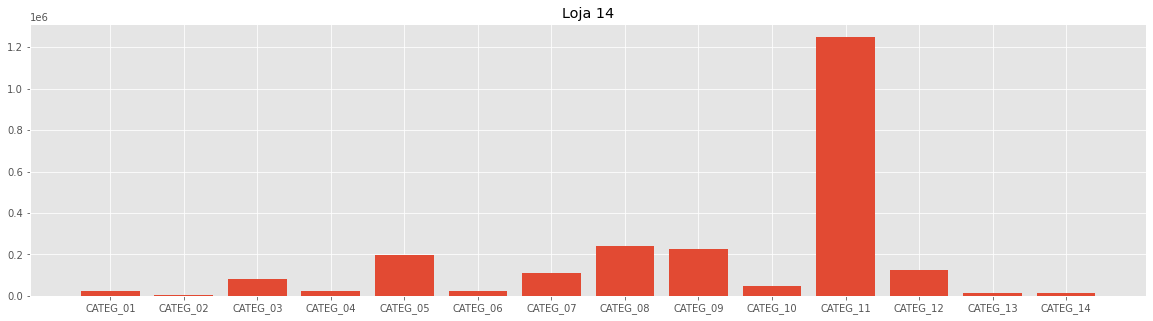

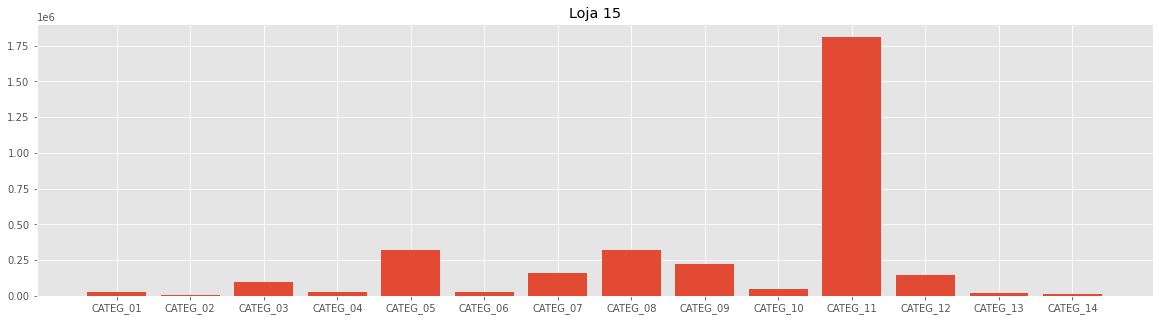

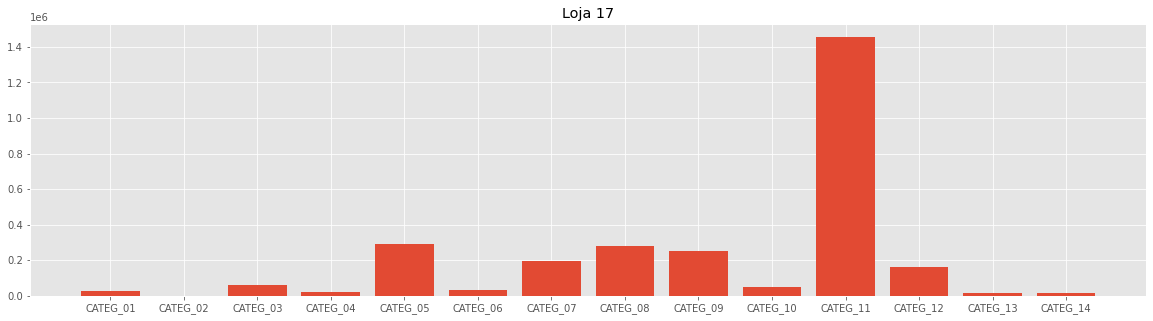

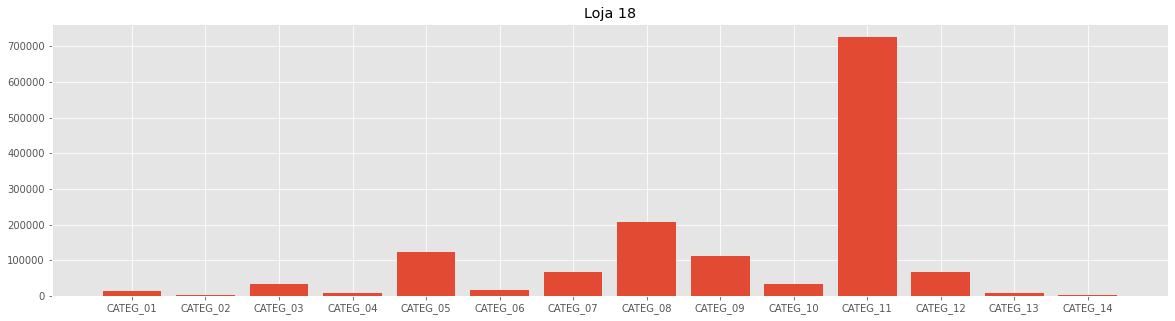

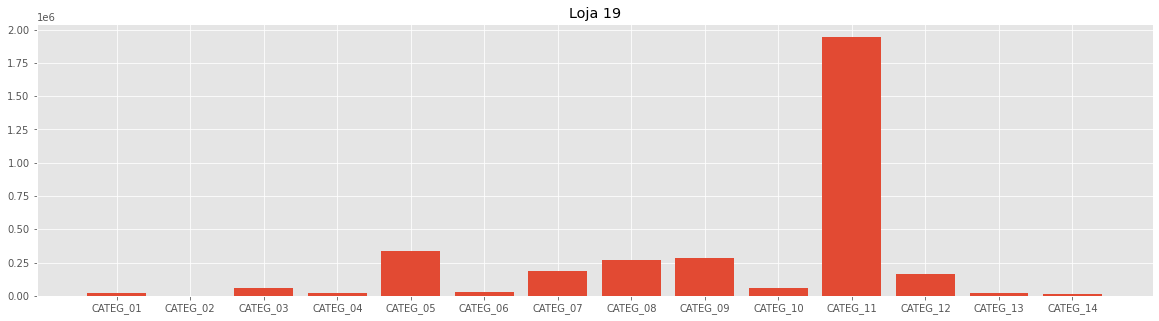

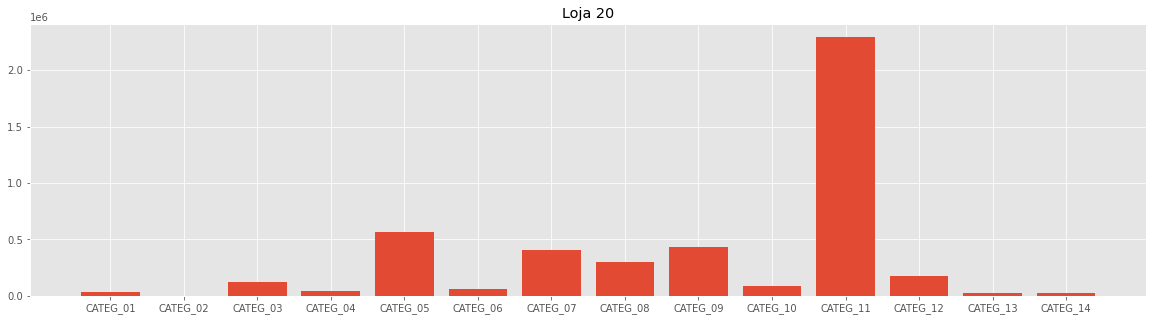

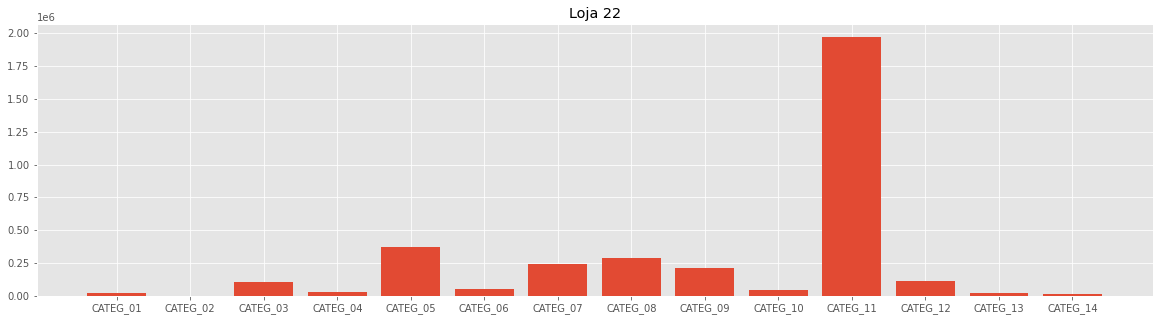

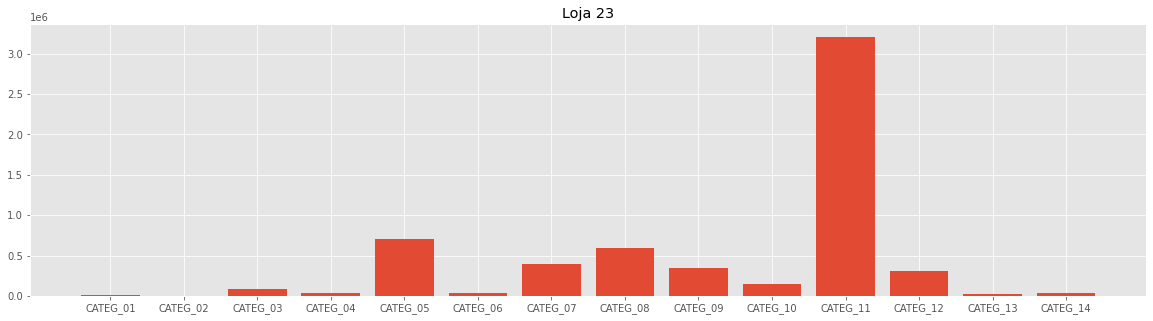

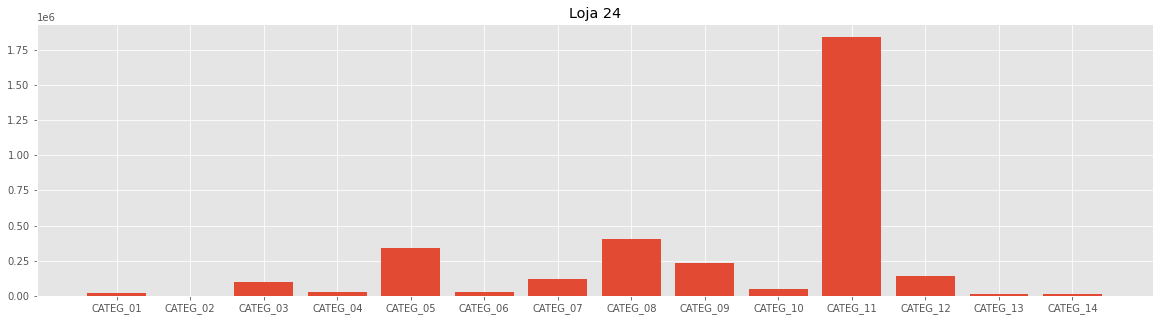

In [154]:
lojas = gb_codlj_cat_receita.cod_loja.unique()
for loja in lojas[0:20]:
    lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja]
    plt.figure(figsize=(20,5))
    plt.bar(x=lj.categoria, height=lj.receita);
    plt.title(f'Loja {str(loja)}', fontdict={'color':'black'})
    plt.show()

### A categoria 11 vende mais em todas as lojas? Sim

In [174]:
categorias = dict()

In [175]:
for loja in lojas:
    lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja]
    idx = lj.receita.argmax()
    row = lj.iloc[idx]
    val = categorias.get(row.categoria, 0)
    categorias[row.categoria] = val + 1

In [176]:
categorias

{'CATEG_11': 3130}

In [172]:
len(lojas)

3130

### Em qual loja tivemos o maior lucro considerando as categorias?

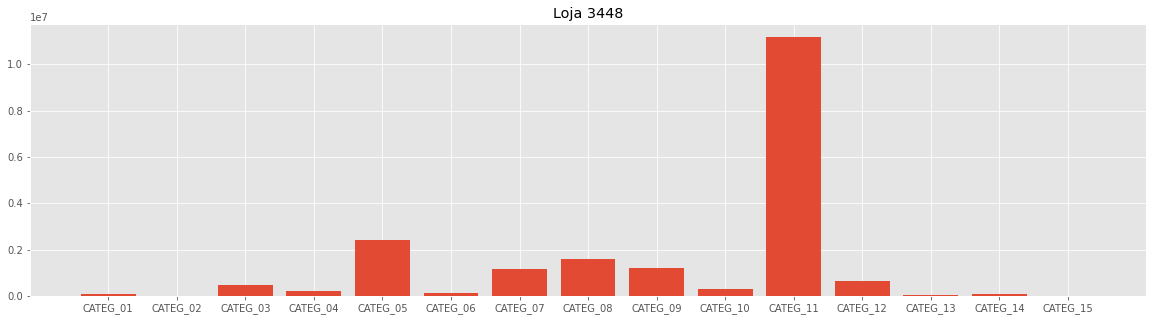

In [163]:
lj = gb_codlj_cat_receita[gb_codlj_cat_receita.cod_loja == loja_das_lojas.cod_loja]
plt.figure(figsize=(20,5))
plt.bar(x=lj.categoria, height=lj.receita);
plt.title(f'Loja {str(loja_das_lojas.cod_loja)}', fontdict={'color':'black'});

### Receita por loja

In [18]:
gb_lj_receita = fat_ljs_atual[['cod_loja', 'receita']].groupby('cod_loja', as_index=False).sum()
gb_lj_receita.head()

,cod_loja,receita
0,1,15990575.05
1,2,1582989.01
2,3,4467056.13
3,4,1460848.26
4,5,5612752.46


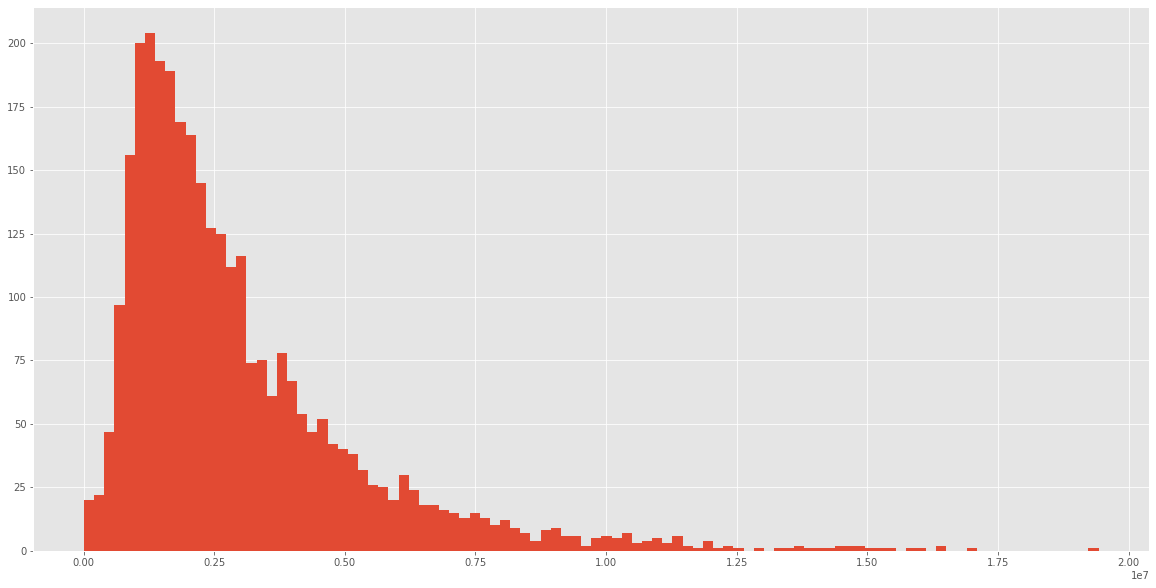

In [30]:
plt.figure(figsize=(20,10))
plt.hist(gb_lj_receita.receita, bins=100);

In [31]:
gb_lj_receita.receita.describe()

count       3130.00
mean     2991481.66
std      2365832.50
min         9202.70
25%      1403307.18
50%      2281479.89
75%      3824464.47
max     19426790.13
Name: receita, dtype: float64

In [46]:
gb_cat_receita = fat_ljs_atual[['categoria', 'receita']].groupby('categoria', as_index=False).agg(['sum', 'count'], axis=1)
gb_cat_receita.reset_index(inplace=True)
gb_cat_receita.head()

categoria       receita       
                      sum  count
0  CATEG_01   69459537.75  73330
1  CATEG_02    7507082.78  52734
2  CATEG_03  335854146.21  73637
3  CATEG_04  116636953.57  73344
4  CATEG_05 1189124313.64  73638

In [49]:
gb_cat_receita

categoria       receita       
                       sum  count
0   CATEG_01   69459537.75  73330
1   CATEG_02    7507082.78  52734
2   CATEG_03  335854146.21  73637
3   CATEG_04  116636953.57  73344
4   CATEG_05 1189124313.64  73638
5   CATEG_06  104199931.45  72977
6   CATEG_07  569669595.37  73641
7   CATEG_08  722160378.98  73451
8   CATEG_09  941137765.89  73639
9   CATEG_10  178655007.82  73591
10  CATEG_11 4610573177.40  73639
11  CATEG_12  445713418.95  73637
12  CATEG_13   35811032.09  70967
13  CATEG_14   36804060.18  69931
14  CATEG_15      30879.54    936
15  CATEG_16        299.90      2

### Receita por categoria

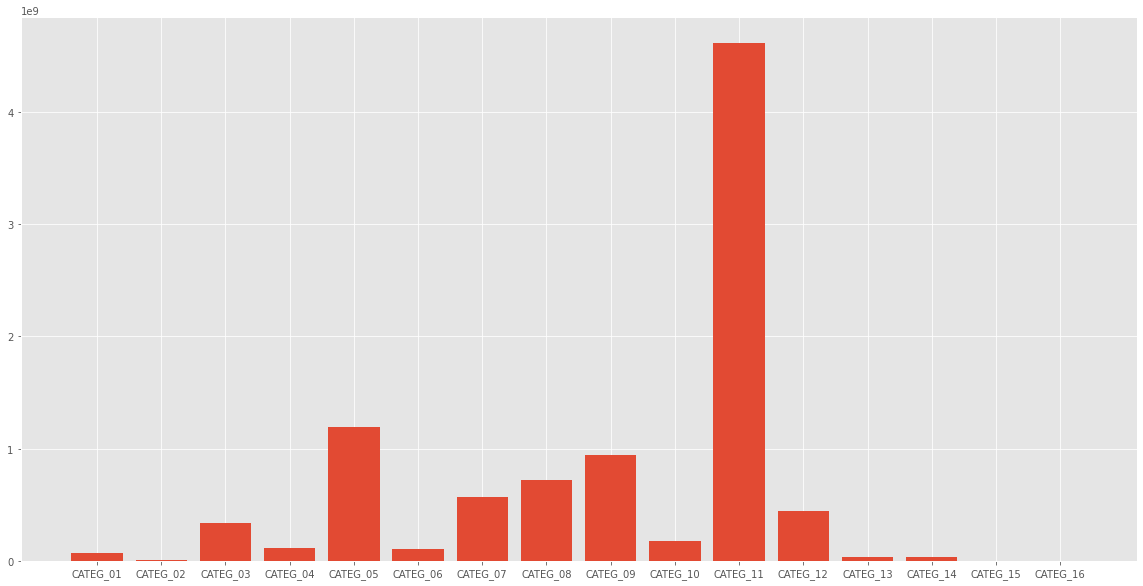

In [53]:
plt.figure(figsize=(20,10))
plt.bar(x=gb_cat_receita.categoria, height=gb_cat_receita['receita']['sum']);

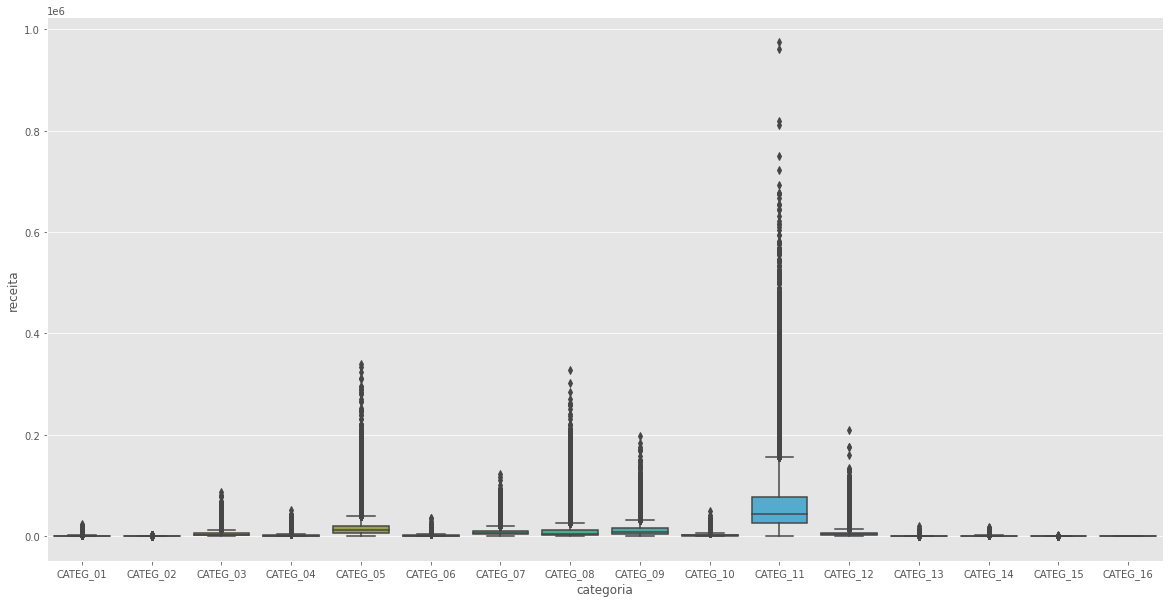

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x=fat_ljs_atual.categoria, y=fat_ljs_atual.receita);

In [56]:
gb_cat_receita['prop'] = gb_cat_receita['receita']['sum'] / gb_cat_receita['receita']['count']
gb_cat_receita.head()

categoria       receita            prop
                      sum  count         
0  CATEG_01   69459537.75  73330   947.22
1  CATEG_02    7507082.78  52734   142.36
2  CATEG_03  335854146.21  73637  4560.94
3  CATEG_04  116636953.57  73344  1590.27
4  CATEG_05 1189124313.64  73638 16148.24

### Receita por unidade de cada categoria

#### (corrigir por quantidades)

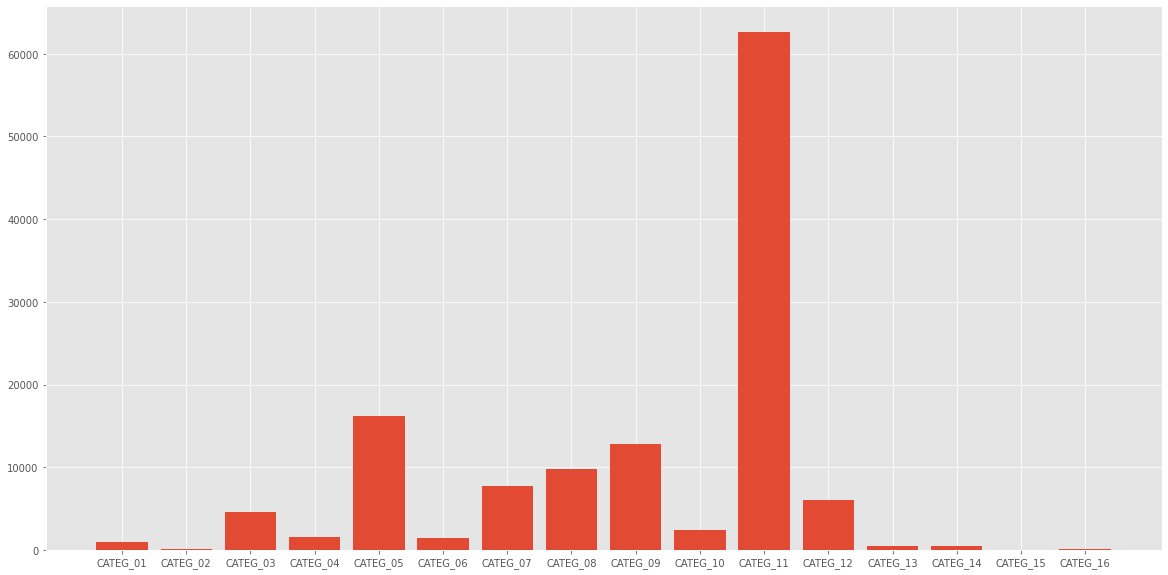

In [57]:
plt.figure(figsize=(20,10))
plt.bar(x=gb_cat_receita.categoria, height=gb_cat_receita['prop']);

### Receita por ano/mês

In [67]:
gb_date_receita = fat_ljs_atual[['datetime', 'receita']].groupby(['datetime'], as_index=False).sum()
gb_date_receita.head()

,datetime,receita
0,2016-01-01,364784885.18
1,2016-02-01,258856554.22
2,2016-03-01,308149053.94
3,2016-04-01,316512361.32
4,2016-05-01,455139463.61


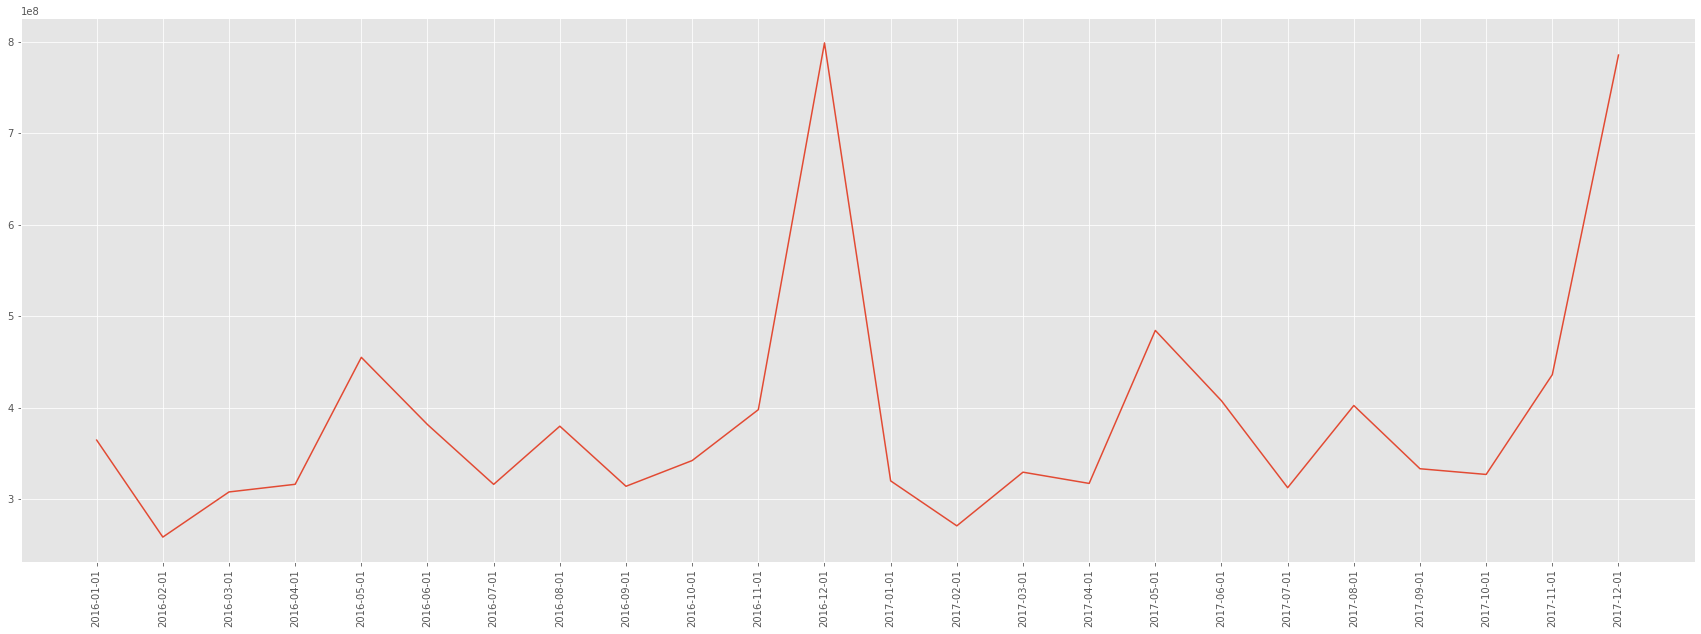

In [89]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.plot(gb_date_receita.datetime.apply(lambda x: x.strftime('%Y-%m-%d')), gb_date_receita.receita);

In [90]:
gb_date_cat_receita = fat_ljs_atual[['datetime', 'categoria', 'receita']].groupby(['datetime', 'categoria'], as_index=False).sum()
gb_date_cat_receita.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44


### Receita ano/mês sem categoria 11

In [146]:
gb_without_11 = gb_date_cat_receita[gb_date_cat_receita.categoria != 'CATEG_11']
gb_without_11.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44


In [147]:
gb_without_11 = gb_without_11[['datetime', 'receita']].groupby('datetime', as_index=False).sum()
gb_without_11.head()

,datetime,receita
0,2016-01-01,153199631.97
1,2016-02-01,141010988.15
2,2016-03-01,148348291.22
3,2016-04-01,161295768.59
4,2016-05-01,218812270.74


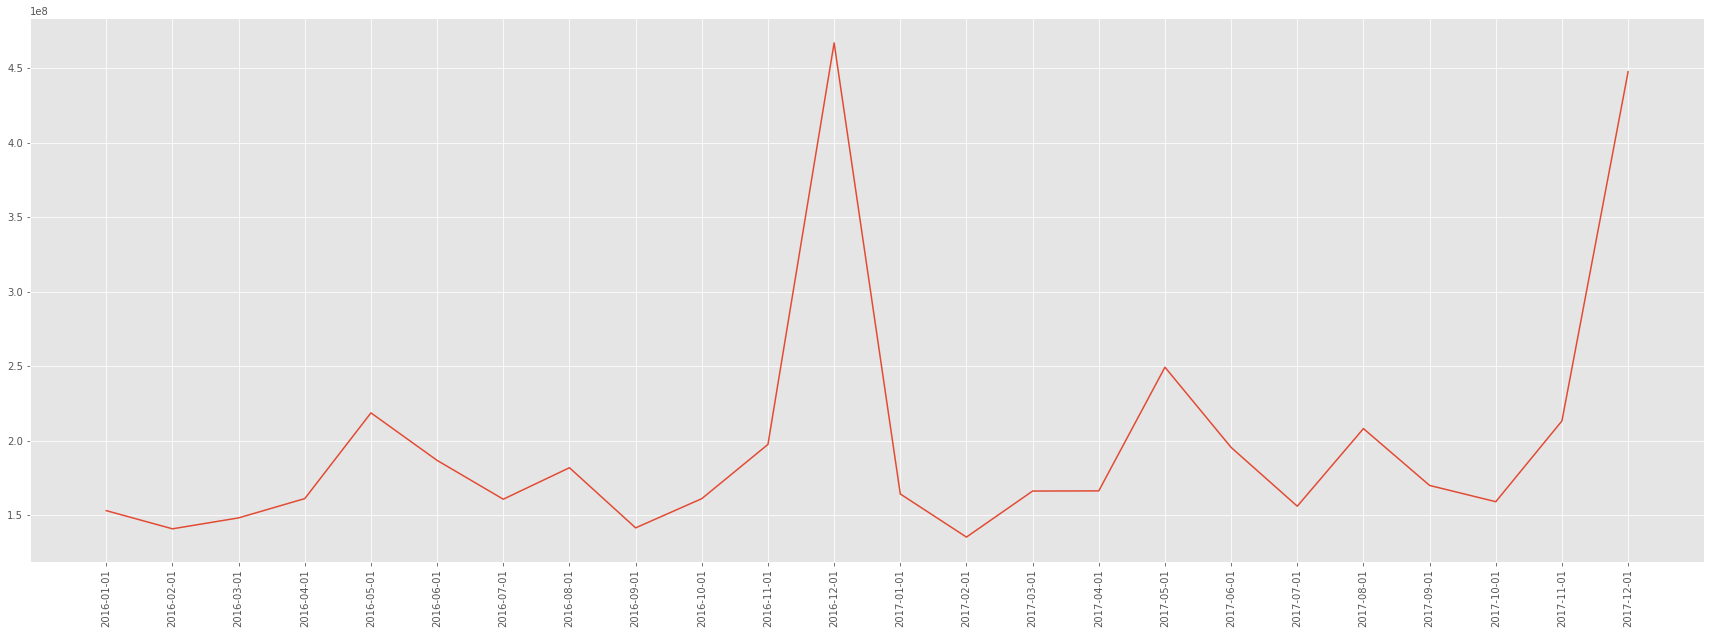

In [148]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.plot(gb_without_11.datetime.apply(lambda x: x.strftime('%Y-%m-%d')), gb_without_11.receita);

In [97]:
gb = gb_date_cat_receita.groupby('categoria', as_index=False)
gb.head()

,datetime,categoria,receita
0,2016-01-01,CATEG_01,2626267.29
1,2016-01-01,CATEG_02,514115.70
2,2016-01-01,CATEG_03,10449226.38
3,2016-01-01,CATEG_04,3876484.36
4,2016-01-01,CATEG_05,35075801.44
...,...,...,...
72,2016-05-01,CATEG_13,871591.65
73,2016-05-01,CATEG_14,857869.05
74,2016-05-01,CATEG_15,1676.63
75,2016-05-01,CATEG_16,269.91


### Receita por categoria, considerando ano/mês

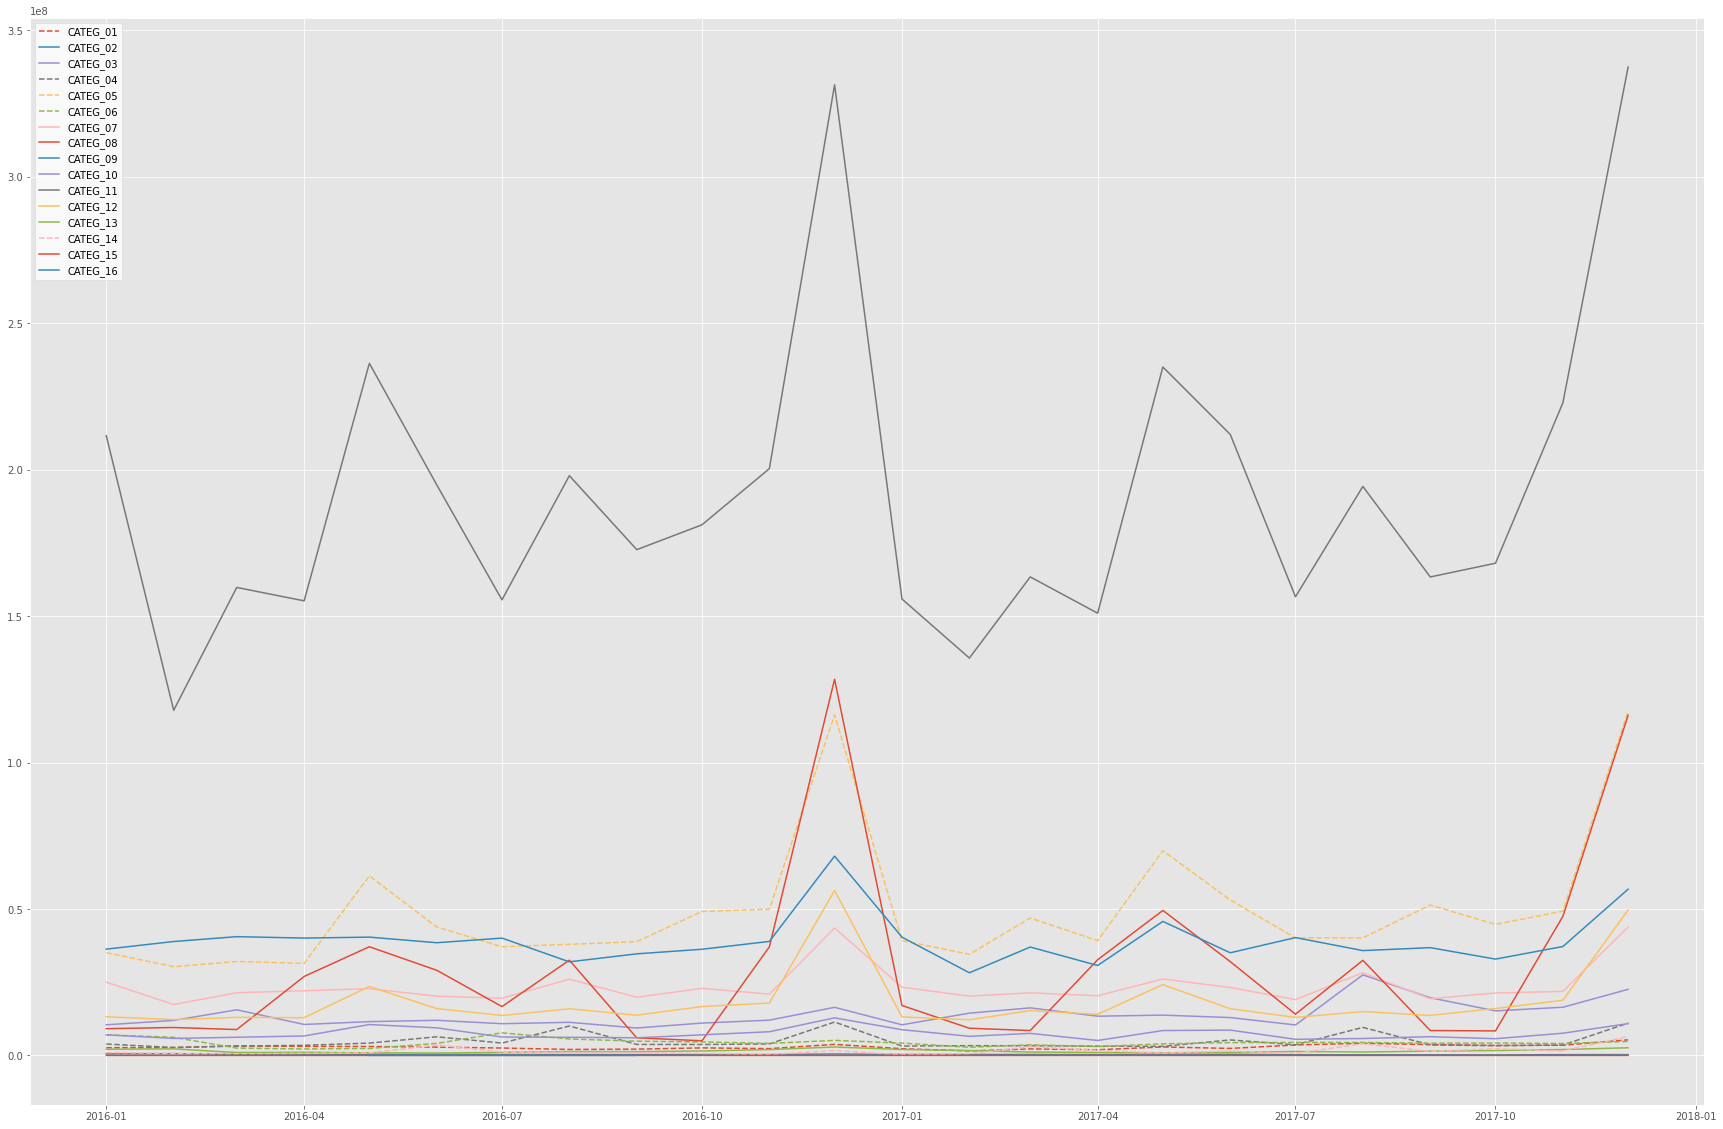

In [120]:
plt.figure(figsize=(30,20))
for i, df in gb:
    if np.random.random() > 0.5:
        line = np.random.choice(['-', '--'])
    plt.plot(df.datetime, df.receita, label=i, linestyle=line)
plt.legend(labelcolor='black', facecolor="white", loc='upper left');

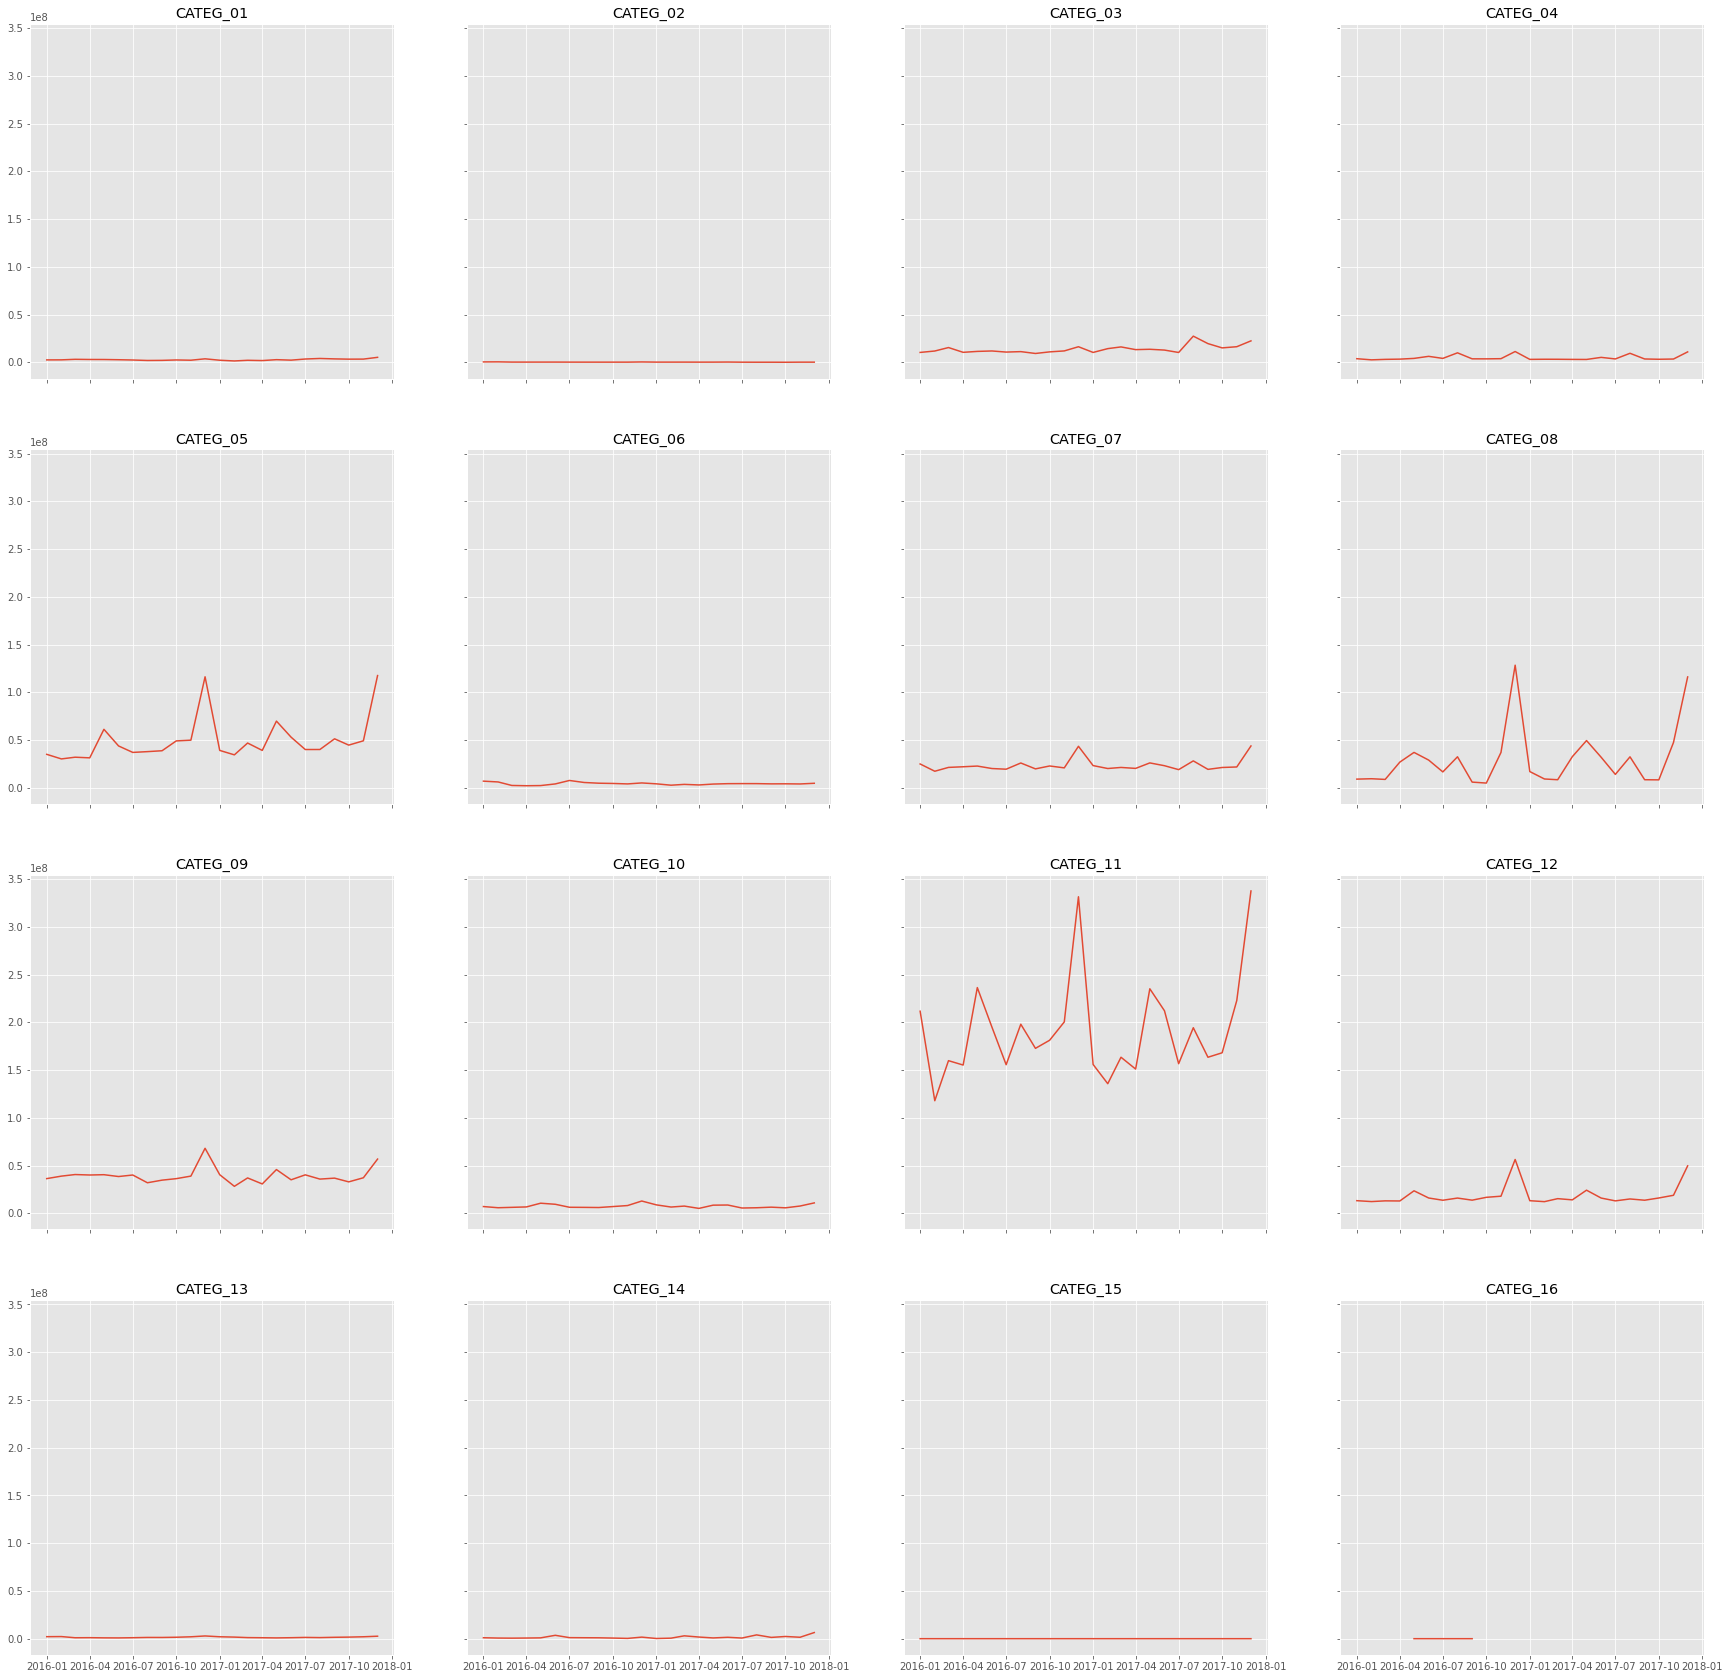

In [141]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(30,30))
m, n = -1, 0
for i, df in gb:
    if n % 4 == 0:
        m += 1
        n = 0
    ax[m, n].plot(df.datetime, df.receita, label=i, linestyle=line)
    ax[m, n].set_title(i, fontdict={'color':'black'})
    n += 1
plt.show();

___

## Cenário de expansão

In [5]:
cen_exp.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,10,2933307005008,2933307,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6,0.134654,0.131481,116.194058,2.913498,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,100.0,93.4,100.0,100.0,71.7,88.8
1,13,2916401003002,2916401,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,41.00,FEATURE_05_VALUE_03,4,0.116662,0.114995,26.345742,1.312612,NaN,NaN,84.3,77.5,100.0,100.0,63.5,78.8
2,16,2928703003003,2928703,NaN,FEATURE_02_VALUE_04,False,42.12,FEATURE_05_VALUE_05,2,0.104162,0.087807,35.362788,1.969512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,2906006003001,2906006,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,6,0.132954,0.131330,9.862757,1.383681,NaN,NaN,85.0,76.9,100.0,100.0,100.0,92.9
4,28,3550308005058,3550308,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,True,44.31,FEATURE_05_VALUE_03,8,0.190102,0.179140,5593.905463,2.815883,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cen_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       553 non-null    int64  
 1   cod_ap         553 non-null    int64  
 2   cod_municipio  553 non-null    int64  
 3   feature_01     189 non-null    object 
 4   feature_02     553 non-null    object 
 5   feature_03     553 non-null    bool   
 6   feature_04     553 non-null    float64
 7   feature_05     553 non-null    object 
 8   feature_06     553 non-null    int64  
 9   feature_07     553 non-null    float64
 10  feature_08     553 non-null    float64
 11  feature_09     553 non-null    float64
 12  feature_10     553 non-null    float64
 13  feature_11     41 non-null     object 
 14  feature_12     41 non-null     object 
 15  feature_13     159 non-null    float64
 16  feature_14     159 non-null    float64
 17  feature_15     159 non-null    float64
 18  feature_16

In [10]:
cen_exp.shape

(553, 21)

In [11]:
cen_exp.cod_loja.nunique()

553

___

## Lojas atuais

In [4]:
ljs_atual.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.22,0.20,1562.67,3.67,NaN,NaN,nan,nan,nan,nan,nan,nan
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.19,0.18,5593.91,2.82,NaN,NaN,nan,nan,nan,nan,nan,nan
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.14,0.14,12.82,7.22,NaN,NaN,nan,nan,nan,nan,nan,nan
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.11,0.10,325.53,1.97,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,100.00,88.10,100.00,100.00,88.50,93.80


In [5]:
ljs_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       3130 non-null   int64  
 1   cod_ap         3130 non-null   int64  
 2   cod_municipio  3130 non-null   int64  
 3   feature_01     1171 non-null   object 
 4   feature_02     3130 non-null   object 
 5   feature_03     3130 non-null   bool   
 6   feature_04     3130 non-null   float64
 7   feature_05     3130 non-null   object 
 8   feature_06     3130 non-null   int64  
 9   feature_07     3130 non-null   float64
 10  feature_08     3130 non-null   float64
 11  feature_09     3130 non-null   float64
 12  feature_10     3130 non-null   float64
 13  feature_11     245 non-null    object 
 14  feature_12     245 non-null    object 
 15  feature_13     874 non-null    float64
 16  feature_14     874 non-null    float64
 17  feature_15     874 non-null    float64
 18  feature_

In [6]:
ljs_atual.shape

(3130, 21)

In [7]:
ljs_atual.cod_loja.nunique()

3130

In [8]:
ljs_atual.describe()

,cod_loja,cod_ap,cod_municipio,feature_04,feature_06,feature_07,feature_08,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
count,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,874.00,874.00,874.00,874.00,874.00,874.00
mean,1839.21,3192584815424.36,3192584.76,34.21,5.69,0.17,0.17,601.69,3.93,94.81,83.69,82.43,96.23,83.41,88.31
std,1066.21,1131140425829.81,1131140.56,13.86,4.91,0.05,0.05,1378.52,2.65,8.60,13.54,34.62,12.97,17.31,9.22
min,1.00,-1.00,-1.00,3.50,0.00,0.06,0.04,1.44,0.42,44.10,0.00,0.00,50.00,13.10,42.10
25%,909.25,2613527753001.00,2613527.75,25.52,3.00,0.14,0.13,11.92,2.42,92.28,79.70,94.97,100.00,72.03,83.53
50%,1836.50,3306008003001.00,3306008.00,31.74,4.00,0.18,0.17,56.90,3.16,100.00,86.90,100.00,100.00,91.20,90.50
75%,2774.50,3552403005009.50,3552403.00,41.00,7.00,0.20,0.19,334.70,4.49,100.00,91.85,100.00,100.00,97.60,95.60
max,3687.00,5300108005050.00,5300108.00,117.36,63.00,0.41,0.39,5593.91,31.80,100.00,100.00,100.00,100.00,100.00,99.90


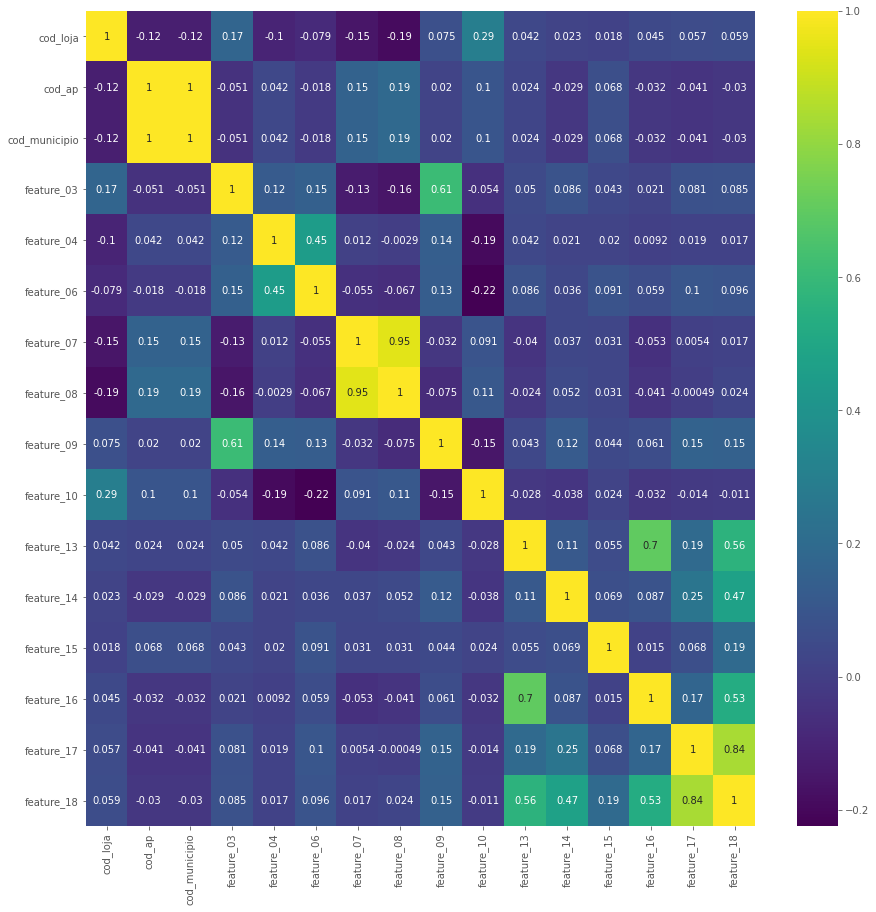

In [11]:
ljs_corr = ljs_atual.corr()
plt.figure(figsize=(15,15))
sns.heatmap(ljs_corr, annot=True, cmap='viridis');

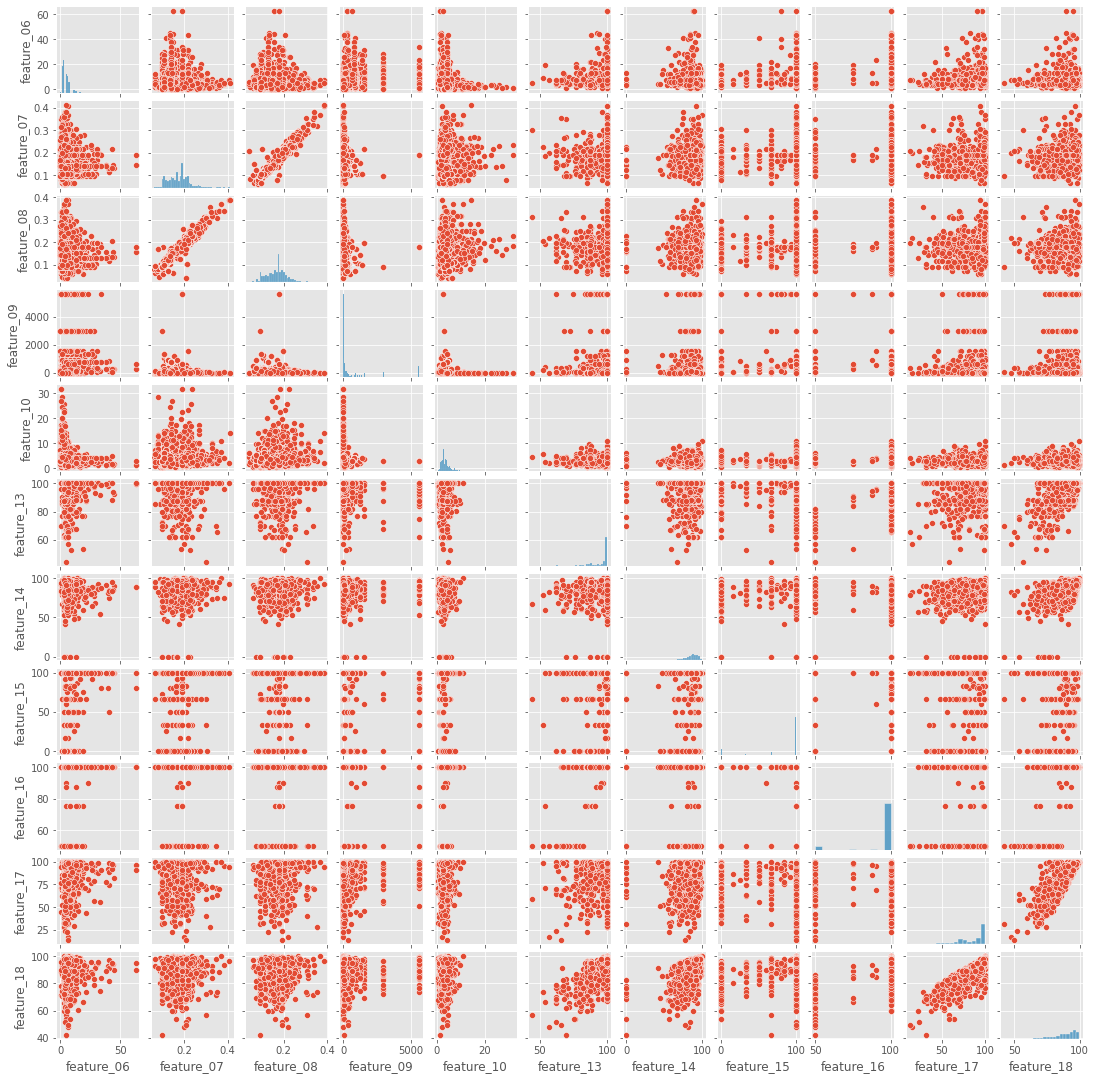

In [21]:
g = sns.PairGrid(ljs_atual[['feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18']])
g.fig.set_size_inches(15,15)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

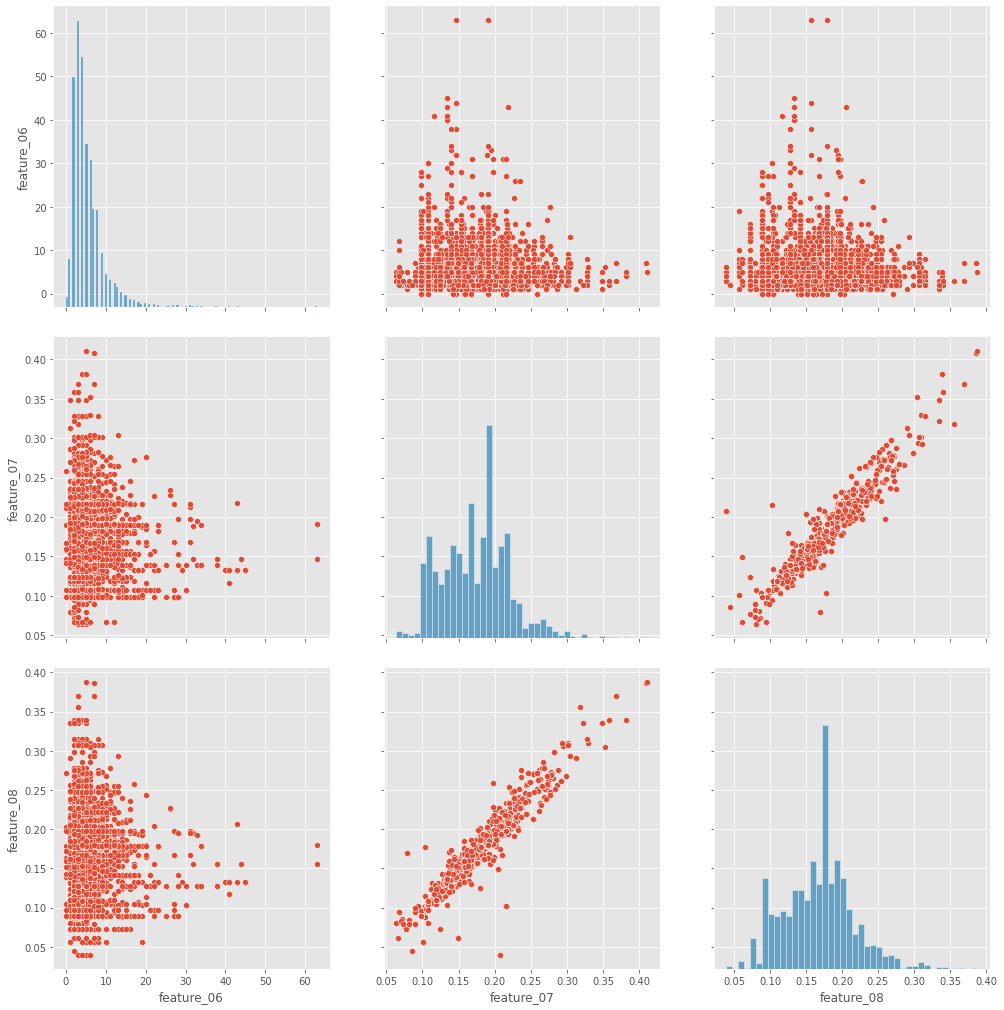

In [20]:
# plt.figure(figsize=(20,20))
g = sns.PairGrid(ljs_atual[['feature_06', 'feature_07', 'feature_08']])
g.fig.set_size_inches(15,15)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

#### Categoricos

In [22]:
ljs_atual.feature_01.value_counts()

FEATURE_01_VALUE_10    630
FEATURE_01_VALUE_08    323
FEATURE_01_VALUE_03    215
FEATURE_01_VALUE_06      3
Name: feature_01, dtype: int64

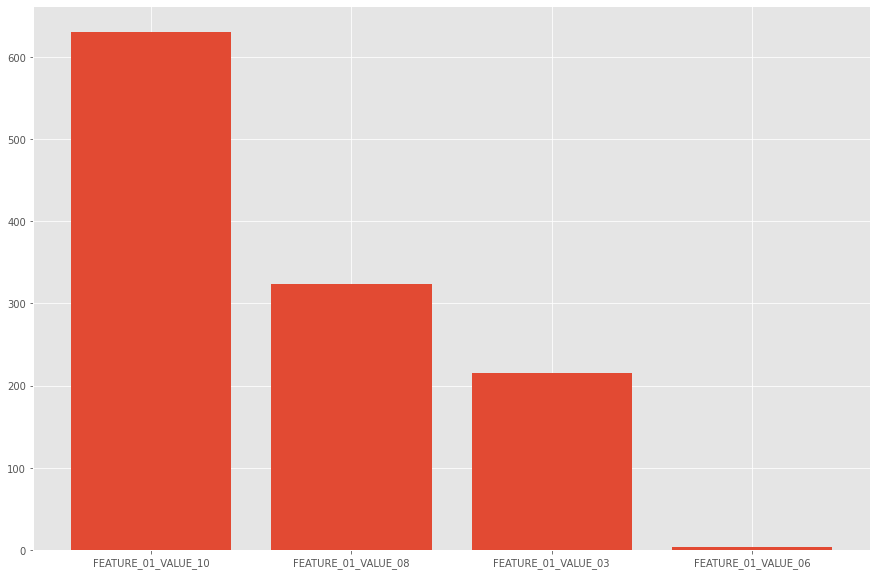

In [31]:
plt.figure(figsize=(15,10))
ljs_atual_f1 = ljs_atual.feature_01.value_counts()
plt.bar(x=ljs_atual_f1.index, height=ljs_atual_f1.values);

In [23]:
ljs_atual.feature_02.value_counts()

FEATURE_02_VALUE_03    894
FEATURE_02_VALUE_06    876
FEATURE_02_VALUE_02    732
FEATURE_02_VALUE_04    628
Name: feature_02, dtype: int64

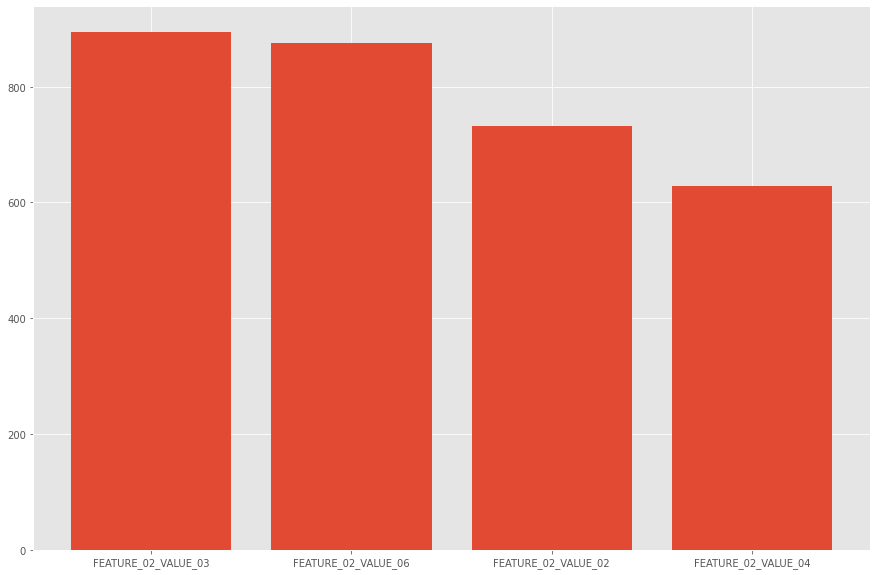

In [32]:
plt.figure(figsize=(15,10))
ljs_atual_f2 = ljs_atual.feature_02.value_counts()
plt.bar(x=ljs_atual_f2.index, height=ljs_atual_f2.values);

In [24]:
ljs_atual.feature_03.value_counts()

False    2337
True      793
Name: feature_03, dtype: int64

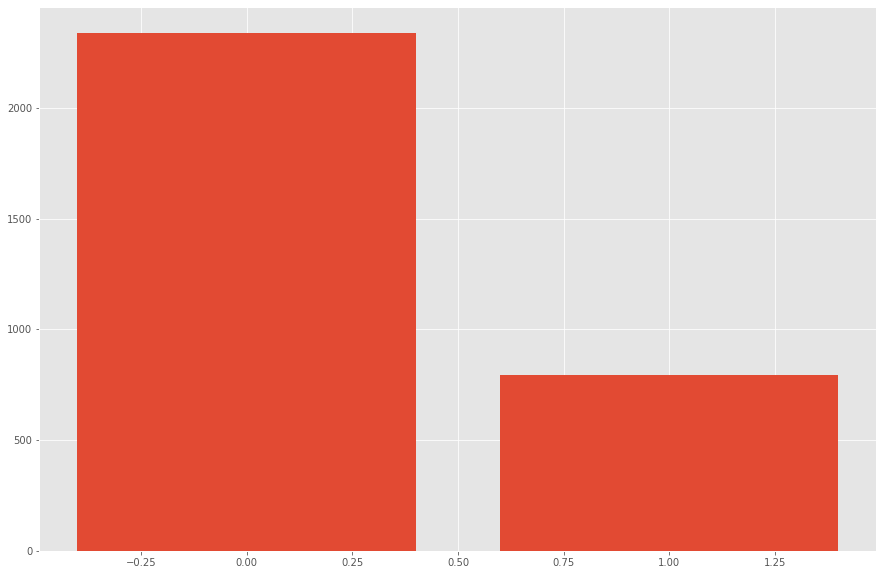

In [33]:
plt.figure(figsize=(15,10))
ljs_atual_f3 = ljs_atual.feature_03.value_counts()
plt.bar(x=ljs_atual_f3.index, height=ljs_atual_f3.values);

In [25]:
ljs_atual.feature_05.value_counts()

FEATURE_05_VALUE_03    1973
FEATURE_05_VALUE_06     514
FEATURE_05_VALUE_05     499
FEATURE_05_VALUE_02     114
FEATURE_05_VALUE_01      14
FEATURE_05_VALUE_07      10
FEATURE_05_VALUE_04       5
FEATURE_05_VALUE_08       1
Name: feature_05, dtype: int64

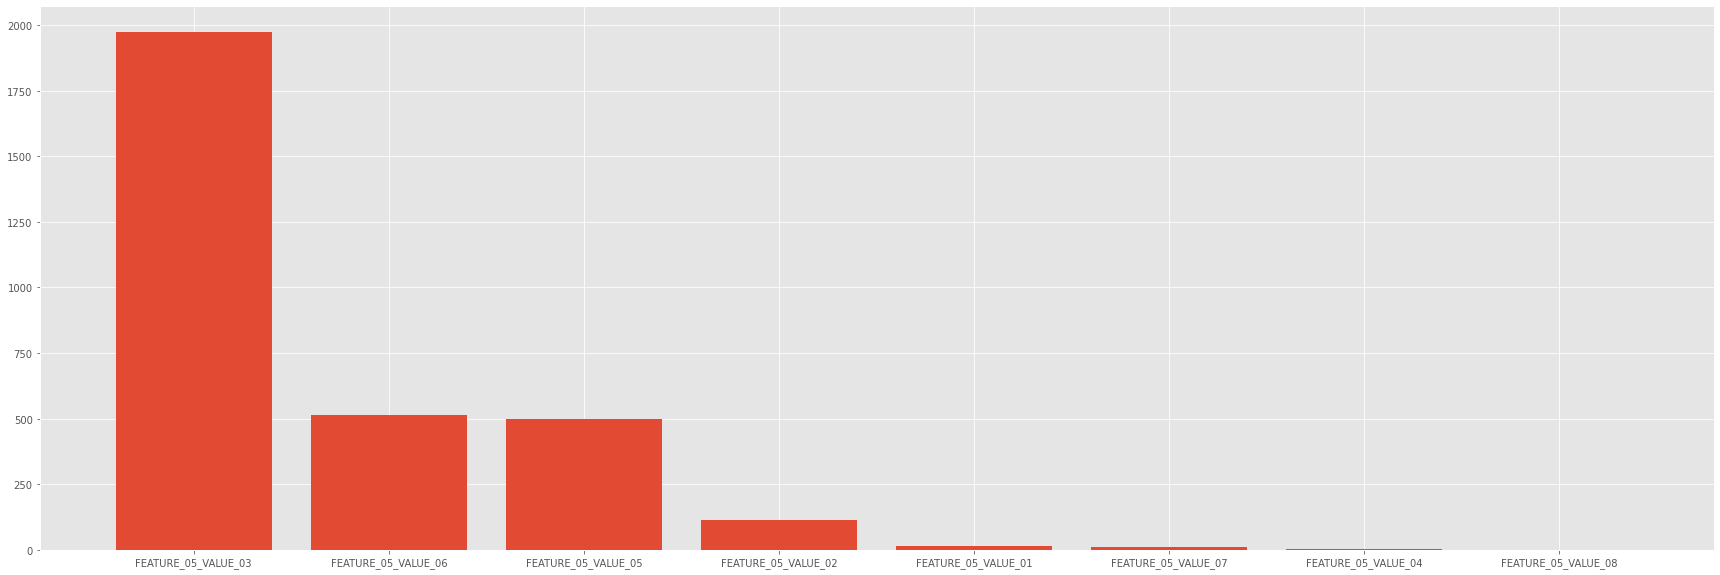

In [35]:
plt.figure(figsize=(30,10))
ljs_atual_f5 = ljs_atual.feature_05.value_counts()
plt.bar(x=ljs_atual_f5.index, height=ljs_atual_f5.values);

In [26]:
ljs_atual.feature_06.value_counts()

3     570
4     498
2     458
5     324
6     292
7     195
8     193
9     108
1      95
10     67
11     54
12     48
13     41
14     30
15     24
0      20
16     16
17     15
18     10
20      9
19      7
22      7
21      6
27      5
28      5
23      4
31      4
41      3
43      2
33      2
25      2
26      2
30      2
32      2
34      2
38      2
63      2
29      1
40      1
44      1
45      1
Name: feature_06, dtype: int64

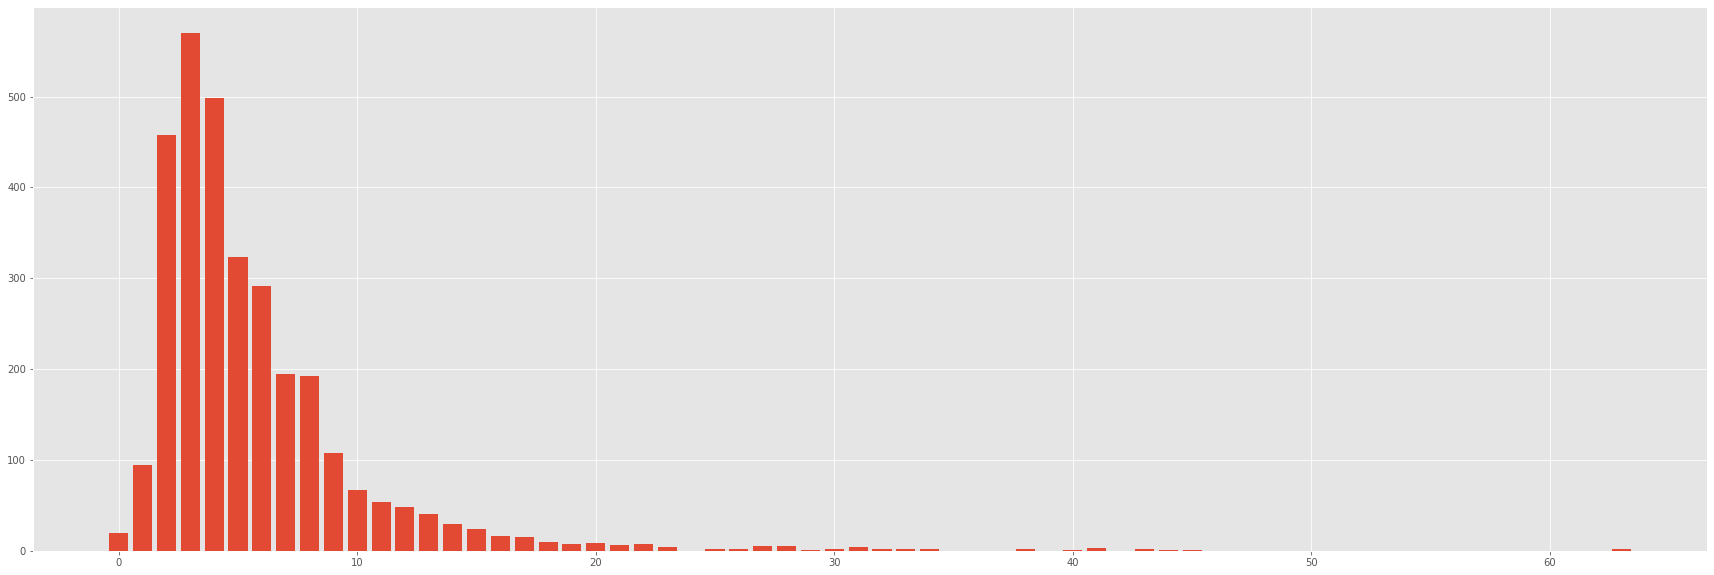

In [36]:
plt.figure(figsize=(30,10))
ljs_atual_f6 = ljs_atual.feature_06.value_counts()
plt.bar(x=ljs_atual_f6.index, height=ljs_atual_f6.values);

In [27]:
ljs_atual.feature_11.value_counts()

FEATURE_11_VALUE_02    96
FEATURE_11_VALUE_01    63
FEATURE_11_VALUE_06    47
FEATURE_11_VALUE_07    28
FEATURE_11_VALUE_03     4
FEATURE_11_VALUE_04     4
FEATURE_11_VALUE_05     3
Name: feature_11, dtype: int64

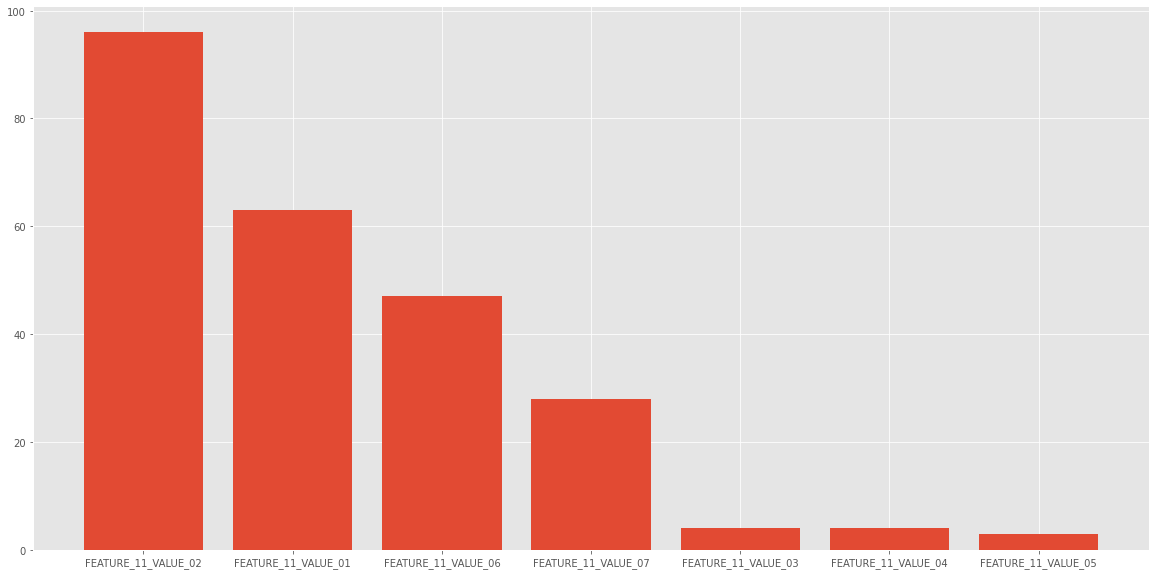

In [38]:
plt.figure(figsize=(20,10))
ljs_atual_f11 = ljs_atual.feature_11.value_counts()
plt.bar(x=ljs_atual_f11.index, height=ljs_atual_f11.values);

In [28]:
ljs_atual.feature_12.value_counts()

FEATURE_12_VALUE_01    152
FEATURE_12_VALUE_02     93
Name: feature_12, dtype: int64

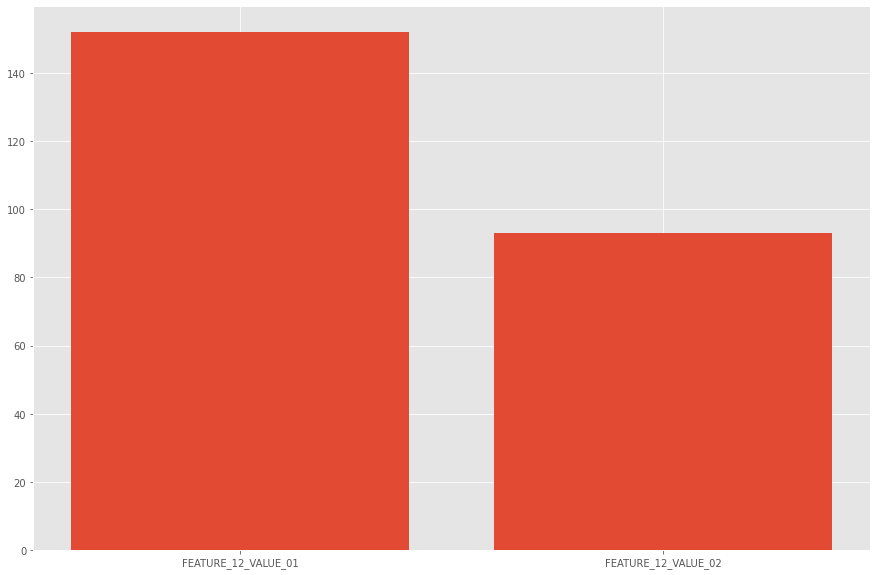

In [40]:
plt.figure(figsize=(15,10))
ljs_atual_f12 = ljs_atual.feature_12.value_counts()
plt.bar(x=ljs_atual_f12.index, height=ljs_atual_f12.values);

In [50]:
ljs_fat_join = pd.merge(ljs_atual, gb_fat_lj_tri, how='inner', on='cod_loja')
ljs_fat_join.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,tri,receita
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,1,2938994.31
1,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,2,3780701.04
2,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,3,3779037.95
3,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,4,5491841.75
4,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.22,0.20,1562.67,3.67,NaN,NaN,nan,nan,nan,nan,nan,nan,1,313904.70


In [60]:
ljs_fat_join_mes = pd.merge(ljs_atual, gb_fat_lj_mes, how='inner', on='cod_loja')
ljs_fat_join_mes.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,mes,receita
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,1,845942.14
1,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,2,878950.40
2,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,3,1214101.77
3,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,4,1146681.44
4,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.17,0.17,115.96,2.35,NaN,NaN,nan,nan,nan,nan,nan,nan,5,1343759.90


### Baselines

In [89]:
features = ['cod_loja', 'feature_03', 'feature_04', 'feature_06', 'feature_07', 'feature_10', 'feature_09', 'mes']
sampled = ljs_fat_join_mes[features]
sampled.isna().sum()

cod_loja      0
feature_03    0
feature_04    0
feature_06    0
feature_07    0
feature_10    0
feature_09    0
mes           0
dtype: int64

In [90]:
X[X.cod_loja == loja_das_lojas.cod_loja]

,cod_loja,feature_03,feature_04,feature_06,feature_07,feature_10,feature_09,mes
35075,3448,True,84.86,18,0.19,2.82,5593.91,1
35076,3448,True,84.86,18,0.19,2.82,5593.91,2
35077,3448,True,84.86,18,0.19,2.82,5593.91,3
35078,3448,True,84.86,18,0.19,2.82,5593.91,4
35079,3448,True,84.86,18,0.19,2.82,5593.91,5
35080,3448,True,84.86,18,0.19,2.82,5593.91,6
35081,3448,True,84.86,18,0.19,2.82,5593.91,7
35082,3448,True,84.86,18,0.19,2.82,5593.91,8
35083,3448,True,84.86,18,0.19,2.82,5593.91,9
35084,3448,True,84.86,18,0.19,2.82,5593.91,10


In [98]:
X = sampled
y = ljs_fat_join_mes.receita
y_loja_das_lojas = ljs_fat_join_mes[ljs_fat_join_mes.cod_loja == loja_das_lojas.cod_loja].receita.iloc[0:3]

In [99]:
X.head()

,cod_loja,feature_03,feature_04,feature_06,feature_07,feature_10,feature_09,mes
0,1,True,21.76,31,0.17,2.35,115.96,1
1,1,True,21.76,31,0.17,2.35,115.96,2
2,1,True,21.76,31,0.17,2.35,115.96,3
3,1,True,21.76,31,0.17,2.35,115.96,4
4,1,True,21.76,31,0.17,2.35,115.96,5


In [100]:
y_loja_das_lojas

35075   1392805.18
35076   1030966.56
35077   1253968.54
Name: receita, dtype: float64

In [105]:
rf = RandomForestRegressor()
rf.fit(X, y)
y_hat = rf.predict(X[X.cod_loja == loja_das_lojas.cod_loja].iloc[0:3])
np.sqrt(mean_squared_error(y_loja_das_lojas, y_hat))

90361.44850491302

In [103]:
y_loja_das_lojas - y_hat

35075   104691.17
35076   -99562.73
35077    46270.41
Name: receita, dtype: float64

In [104]:
mean_absolute_error(y_loja_das_lojas, y_hat)

83508.10176666612

In [84]:
X_loja_das_lojas = ljs_fat_join_mes[ljs_fat_join_mes.cod_loja == loja_das_lojas.cod_loja][features]
y_loja_das_lojas = ljs_fat_join_mes[ljs_fat_join_mes.cod_loja == loja_das_lojas.cod_loja].receita

In [87]:
X_loja_das_lojas.describe()
X_loja_das_lojas.drop('cod_loja', inplace=True, axis=1)

In [88]:
rf = RandomForestRegressor()
rf.fit(X_loja_das_lojas, y_loja_das_lojas)
y_hat = rf.predict(X_loja_das_lojas)
mean_squared_error(y_loja_das_lojas, y_hat)

103330657616.39038

In [65]:
features = ['cod_loja', 'feature_03', 'feature_06', 'feature_07', 'feature_10', 'tri']
sampled = ljs_fat_join[features]
sampled.isna().sum()

cod_loja      0
feature_03    0
feature_06    0
feature_07    0
feature_10    0
tri           0
dtype: int64

In [66]:
X = sampled
y = ljs_fat_join.receita
rf = RandomForestRegressor()
rf.fit(X, y)
y_hat = rf.predict(X)
mean_squared_error(y, y_hat)

13873624101.444244

___